In [1]:
! nvidia-smi

Mon May  8 17:49:37 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   72C    P0    33W /  70W |   5520MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  Tesla T4            Off  | 00000000:00:05.0 Off |                    0 |
| N/A   

In [2]:
from train_pipeline import train, _train_seed

import os
from hydra import initialize, initialize_config_module, initialize_config_dir, compose
from hydra.utils import instantiate
from omegaconf import OmegaConf


def load_cfg(overrides=()):
    # with initialize_config_dir(config_dir="/app/notebooks/draft_02/conf"):
    with initialize(version_base=None, config_path="./conf"):
        cfg = compose(config_name='config', overrides=list(overrides))
        return cfg

from IPython.display import clear_output
from spellbook import count_parameters


def get_experiment_name(cfg):
    h = cfg.model['hidden_features']
    nh = cfg.model['hidden_layers']
    nparams=count_parameters(instantiate(cfg.model, out_features=3))
    
    experiment_name = f'siren_split_nh={nh}_h={h}__nparams={nparams}_omega30'
    return experiment_name

In [3]:
cfg = load_cfg(overrides=[
    '+exp=05_siren_split',
    "+device=cuda:0",
    f'model.hidden_layers={3}',
    f'model.hidden_features={128}'
])

cfg.random_seed = [0]
cfg.logging.experiment_name=get_experiment_name(cfg)
print(OmegaConf.to_yaml(cfg))

+---------------------+------------+
|       Modules       | Parameters |
+---------------------+------------+
| net.0.linear.weight |    256     |
|  net.0.linear.bias  |    128     |
| net.1.linear.weight |   16384    |
|  net.1.linear.bias  |    128     |
| net.2.linear.weight |   16384    |
|  net.2.linear.bias  |    128     |
| net.3.linear.weight |   16384    |
|  net.3.linear.bias  |    128     |
|     net.4.weight    |     96     |
|      net.4.bias     |     3      |
+---------------------+------------+
Total Trainable Params: 50019
image: tokyo512.png
image_dir: ../../data
image_W: 512
use_wandb: true
is_debug: false
total_steps: 3000
random_seed:
- 0
model:
  _target_: spellbook.siren.model.SirenWithSplit
  in_features: 2
  out_features: none
  hidden_features: 128
  hidden_layers: 3
  init_c: 6
  first_layer_init_c: 1
  outermost_linear: true
logging:
  logger:
    _target_: spellbook.logging.wandb.WandbLogger
    project: 01_splitnet__${image}
  steps_till_summary: 500
  e

Setting seed to 0


Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: kilianovski. Use `wandb login --relogin` to force relogin


********************************************************************************


image: tokyo512.png
image_dir: ../../data
image_W: 512
use_wandb: true
is_debug: false
total_steps: 3000
random_seed:
- 0
model:
  _target_: spellbook.siren.model.SirenWithSplit
  in_features: 2
  out_features: none
  hidden_features: 128
  hidden_layers: 3
  init_c: 6
  first_layer_init_c: 1
  outermost_linear: true
logging:
  logger:
    _target_: spellbook.logging.wandb.WandbLogger
    project: 01_splitnet__${image}
  steps_till_summary: 500
  experiment_name: siren_split_nh=3_h=128__nparams=50019_omega30
optimizer:
  _target_: torch.optim.AdamW
  weight_decay: 0.0
  lr: 0.0001
device: cuda:0


********************************************************************************
+---------------------+------------+
|       Modules       | Parameters |
+---------------------+------------+
| net.0.linear.weight |    256     |
|  net.0.linear.bias  |    128     |
| net.1.linear.weight |   16384    |
|  net.1.

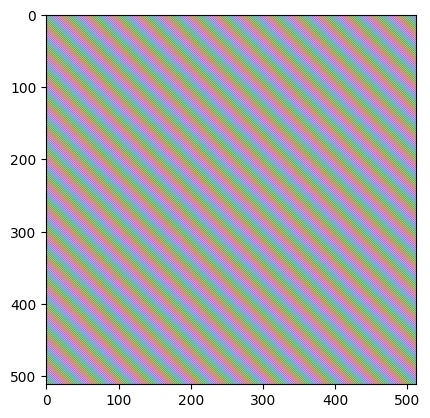

Step 500, Total loss 0.018195


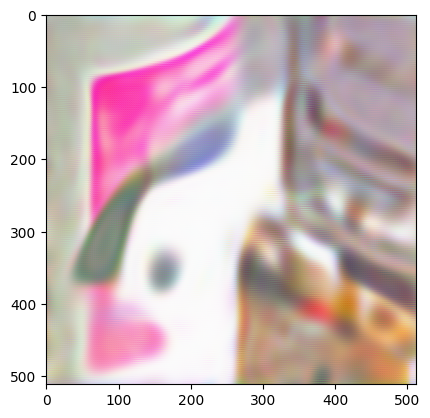

Step 1000, Total loss 0.012148


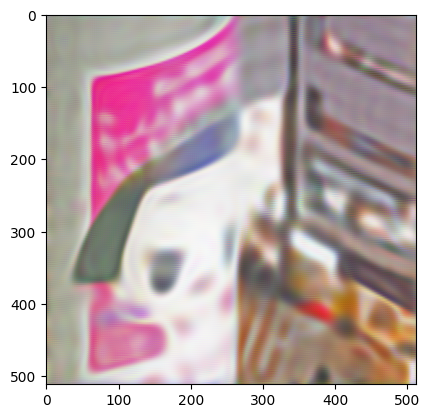

Step 1500, Total loss 0.010245


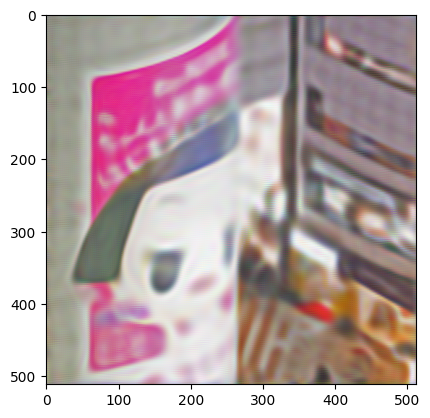

Step 2000, Total loss 0.009134


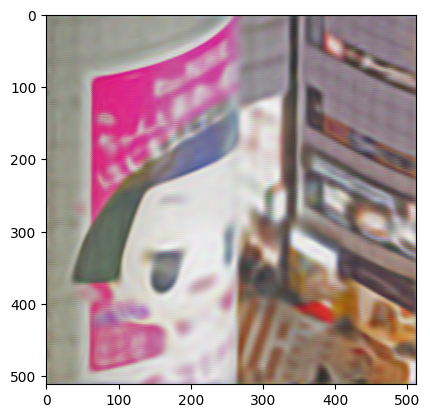

Step 2500, Total loss 0.008381


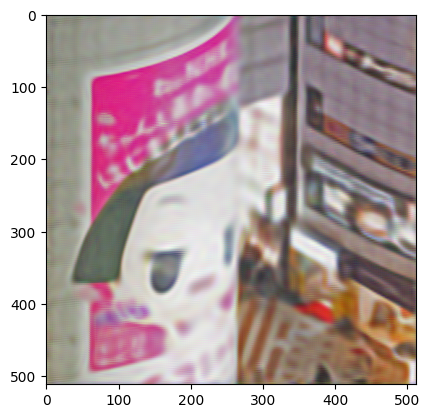

In [4]:
train(cfg)

In [5]:
break

SyntaxError: 'break' outside loop (668683560.py, line 4)

In [ ]:
for h in ([64,128,256,512]):
    for nh in [1,2,3,4,5]:
        cfg = load_cfg(overrides=[
            "+device=cuda:0",
            f'model.hidden_layers={nh}',
            f'model.hidden_features={h}'
        ])

        cfg.logging.experiment_name=get_experiment_name(cfg)

        # print(OmegaConf.to_yaml(cfg))
        train(cfg)

In [ ]:
! ls ../../data